In [4]:
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
import numpy as np
import random
from SoccerWorld import player, game

In [32]:
def friend_action(qtable, player_state, rand_rate, num_actions):
    if np.random.rand() < rand_rate:
        action = np.random.randint(0, num_actions)
    else:
        action = np.argmax(np.max(qtable[player_state, :, :]), axis=0)
        if action > 4:
            print (qtable[player_state, :, :])

    return action



def friend_q_learning():
    
    errors = []
    qs = []
    #hyperparameters
    num_actions = 5
    num_rows = 2
    num_cols = 4
    num_states = num_rows * num_cols * 2 #2 is for possession
#     n = 1000000
    n = 1000000
    gamma = 0.9
    alpha = 0.7
    alpha_dec = 0.99
    rar = 0.5
    radr = 0.99
    rand_rate = rar
    qtableA = np.zeros(shape=(num_states, num_actions, num_actions), dtype='float')
    qtableB = np.zeros(shape=(num_states, num_actions, num_actions), dtype='float')
    verbose = False
    
    i = 0
    ind = []
    errors.append(0)
    ind.append(0)
    qs.append(0)
    while i < n:
        q = 0
        match = game(verbose=verbose, rows=2, columns=4, goalRstart=0, \
                     goalRend=1, aGoal=0, bGoal=3,aPosition=[0,2],\
                     bPosition=[0,1])
        
        initial_state = match.reset()
        
        state, score, done = match.move(4, 4)
        
        
        rand_rate *= radr
        
        if rand_rate < 0.05:
            rand_rate = 0.1
            


        while True:
            q += 1
            old_state = state
            pA_act = friend_action(qtableA, state[0], rand_rate, num_actions)
            pB_act = friend_action(qtableB, state[1], rand_rate, num_actions)

            state, score, done = match.move(pA_act, pB_act)

         
            if q > 100:
                break

            if done:
                qtableA[old_state[0], pA_act, pB_act] = qtableA[old_state[0], pA_act, pB_act] + alpha * (score[0] - qtableA[old_state[0], pA_act, pB_act])
                qtableB[old_state[1], pB_act, pA_act] = qtableB[old_state[1], pB_act, pA_act] + alpha * (score[1] - qtableB[old_state[1], pB_act, pA_act])                   
                break

            else:            
                qtableA[old_state[0], pA_act, pB_act] = qtableA[old_state[0], pA_act, pB_act] + alpha * (score[0] + gamma * (np.max(qtableA[state[0], :, :]) - qtableA[old_state[0], pA_act, pB_act]))          
                qtableB[old_state[1], pB_act, pA_act] = qtableB[old_state[1], pB_act, pA_act] + alpha * (score[1] + gamma * (np.max(qtableB[state[1], :, :]) - qtableB[old_state[1], pB_act, pA_act]))        
                if old_state[0] == 2 and pA_act == 1 and pB_act == 4:
                    
                    error = abs(qtableA[2, 1, 4] - qs[-1])
                
                    qs.append(qtableA[2,1,4])
                    print (i, qtableA[2, 1, 4], error)
                    errors.append(error)
                    ind.append(i)
                    if alpha < 0.001:
                        alpha = 0.001
                    alpha *= alpha_dec
            i += 1
        
        if i % 10000 == 0:
            print (i)
    return errors, ind
        
        

In [33]:
errr, ind = friend_q_learning()


3602 62.99999999870644 62.99999999870644
27776 86.07689999951323 23.076900000806788
31766 94.6738990951138 8.596999095600566
34847 97.92968263571721 3.2557835406034172
40162 99.18258795344238 1.2529053177251654
51731 99.67231890889754 0.4897309554551583
54512 99.86667721173997 0.19435830284243139
62192 99.94496450888478 0.07828729714481142
74619 99.97695824456682 0.03199373568203612
77612 99.99021914039714 0.013260895830327968
77948 99.99579188988203 0.005572749484883843
90466 99.99816552952109 0.002373639639060343
96740 99.99918993905557 0.0010244095344802417
104298 99.99963777172601 0.00044783267044579134
114259 99.99983602283268 0.00019825110666715773
121355 99.9999248716903 8.88488576151758e-05
140000
149234 99.99996517189767 4.030020737388895e-05
161026 99.9999836675081 1.8495610433433285e-05
163526 99.99999225421233 8.586704225876929e-06
200587 99.99999628578817 4.031575841167978e-06
210670 99.99999819965234 1.913864167590873e-06
238363 99.9999991180611 9.184087588209877e-07
2400

In [24]:
errr

[0,
 0.0,
 62.37,
 23.235132690000007,
 8.799414974296184,
 3.3862305883280186,
 1.3235971768595505,
 0.5252927103665854,
 0.2115872895731883,
 0.086469555894368,
 0.035840258999613184,
 0.015061485093781357,
 0.006415242267479471,
 0.002768674417410466,
 0.0012103585687555096,
 0.0005358138017754754,
 0.00024013204760819917,
 0.00010891947937352597,
 4.998813631118537e-05,
 2.3207308714745523e-05,
 1.0896150939743166e-05,
 5.172605838765776e-06,
 2.482185834651318e-06,
 1.2037924363994534e-06,
 5.898859711805926e-07,
 2.920069874789988e-07,
 1.4599548592286737e-07,
 7.370914545390406e-08,
 3.757132560622267e-08]

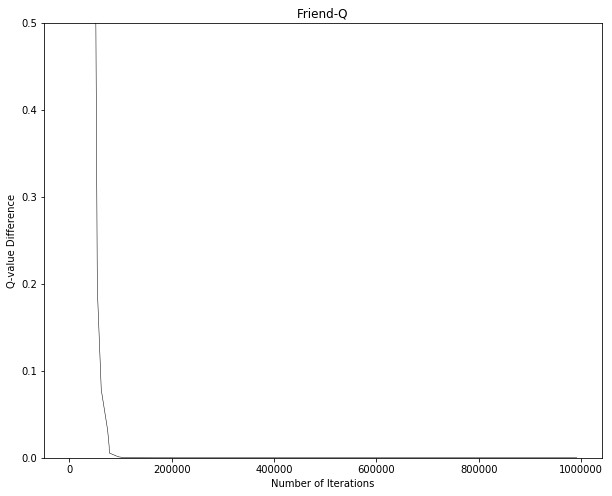

In [41]:
errr[0] = 1

plt.figure('Q-Learning')
plt.clf()
plt.title('Friend-Q')
plt.xlabel('Number of Iterations')
plt.ylabel('Q-value Difference')
plt.ylim(0, 0.5)
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(ind, errr, linestyle='-', color='black', linewidth=0.5)
plt.savefig('FriendQ.png')

# 24.24